In [589]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [590]:
xi_input = np.loadtxt('xi_functions/QPM_mock_1.xi',skiprows=2)

In [647]:
xis_in=[];xis_out=[]
for i in range(20):
    xis_in.append(np.loadtxt('input_xi_%d'%i))
    xis_out.append(np.loadtxt('output_xi_%d'%i))

In [648]:
rr = np.genfromtxt('xi_functions/QPM_mean.xi',max_rows=1,skip_header=0)
mumu = np.genfromtxt('xi_functions/QPM_mean.xi',max_rows=1,skip_header=1)

In [649]:
true=xi_input.mean(axis=1)
old = xis_in[-1].mean(axis=1)#xis_in[0].mean(axis=1)
out = xis_out[-1].mean(axis=1)
new = xis_in[-1].mean(axis=1)

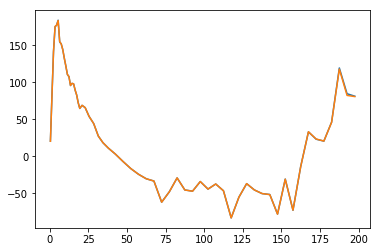

In [653]:
plt.plot(rr,xis_out[-1][:,-1]*rr*rr)
plt.plot(rr,xi_input[:,-1]*rr*rr)

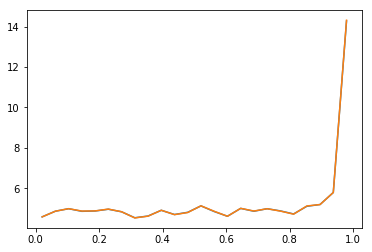

In [654]:
plt.plot(mumu,xis_out[-1][3,:])#*rr*rr)
plt.plot(mumu,xi_input[3,:])#,0]*rr*rr)

In [655]:
r_bins = np.unique(np.loadtxt('python/hybrid_binfile_full.csv').ravel())
mu_bins = np.linspace(0,1.,25)

In [656]:
MU = np.vstack([mumu for _ in range(len(rr))])
R = np.vstack([rr for _ in range(len(mumu))]).T
R_BINS = np.vstack([r_bins for _ in range(len(mu_bins))]).T
MU_BINS = np.vstack([mu_bins for _ in range(len(r_bins))])

In [657]:
R_y = R_BINS*MU_BINS
R_x = R_BINS*np.sqrt(1.-MU_BINS**2.)

In [658]:
ind=np.where(R<35)

In [681]:
all_errs = []
for i in range(20):
    all_errs.append(100.*np.mean(np.abs(xi_input[ind]-xis_out[i][ind])/xi_input[ind]))

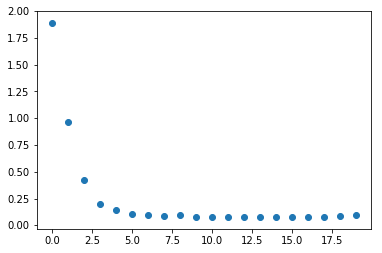

In [683]:
plt.scatter(range(20),all_errs)

(0, 35)

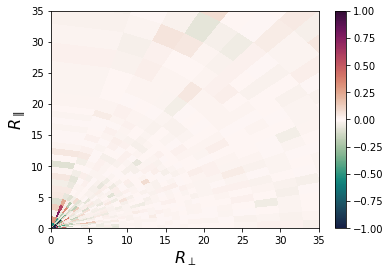

In [684]:
plt.pcolor(R_x,R_y,100./xi_input*(xi_input-xis_out[10]),vmax=1,vmin=-1,cmap=cmocean.cm.curl)
import cmocean
plt.xlabel(r'$R_\perp$',fontsize=16);plt.ylabel(r'$R_\parallel$',fontsize=16);
plt.colorbar();
plt.xlim([0,35])
plt.ylim([0,35])

(0, 35)

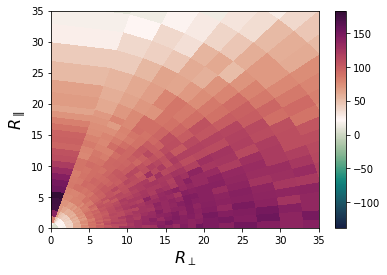

In [668]:
plt.pcolor(R_x,R_y,R*R*xi_input,cmap=cmocean.cm.curl)
import cmocean
plt.xlabel(r'$R_\perp$',fontsize=16);plt.ylabel(r'$R_\parallel$',fontsize=16);
plt.colorbar();
plt.xlim([0,35])
plt.ylim([0,35])

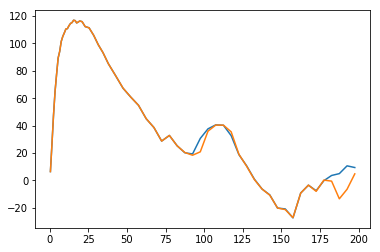

In [669]:
plt.plot(rr,true*rr**2.)
plt.plot(rr,out*rr**2.)

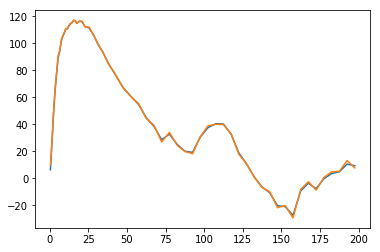

In [670]:
plt.plot(rr,true*rr*rr)
plt.plot(rr,new*rr*rr)
#plt.plot(rr,true*rr*rr)

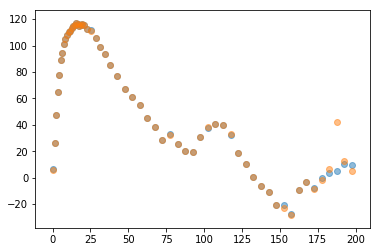

In [671]:
plt.scatter(rr,xi_input.mean(axis=1)*rr*rr,alpha=0.5)
plt.scatter(rr,xis_out[2].mean(axis=1)*rr*rr,alpha=0.5)
#plt.scatter(rr,(xis[-1][:,0]-xi_input[:,0])/xi_input[:,0])

(20, 0)

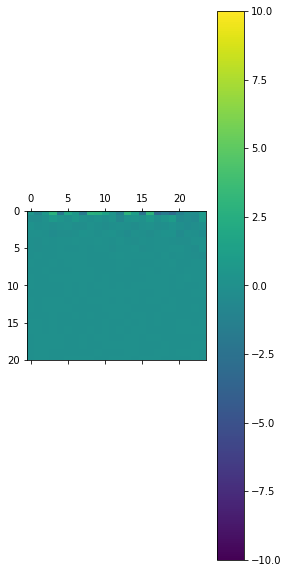

In [672]:
plt.matshow((xis_out[-1]-xi_input)/xi_input*100,vmax=10,vmin=-10)#*np.matmul(np.ones([24,1]),(rr**2.).reshape(1,-1)).T,vmax=30,vmin=-30);
plt.colorbar()
plt.ylim([20,0])

In [239]:
xis[0]

array([[ 1.323907e+01,  1.721080e+01,  1.463653e+01, ...,  2.462798e+01,
         3.153951e+01,  6.028646e+01],
       [ 8.784618e+00,  8.671648e+00,  8.615461e+00, ...,  1.596123e+01,
         2.000764e+01,  3.526234e+01],
       [ 6.349571e+00,  6.341171e+00,  6.368160e+00, ...,  8.163235e+00,
         1.079323e+01,  2.162378e+01],
       ...,
       [ 2.080407e-04,  5.629528e-05,  1.670437e-05, ..., -1.689758e-03,
        -1.861374e-03, -2.049407e-03],
       [ 1.501033e-04,  3.593070e-05, -2.274897e-05, ..., -1.562248e-03,
        -1.750762e-03, -1.892799e-03],
       [ 1.453589e-04,  6.872704e-05, -4.635773e-06, ..., -1.616030e-03,
        -1.646226e-03, -1.704926e-03]])